In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
results = pd.read_csv("results_cifar10.csv", index_col=0)
results.head()

,epoch,num_parameters,dim,rank,loss,accuracy,val_loss,val_accuracy
0,1,15640,10,5,2.160614,0.15286,2.075803,0.1805
1,2,15640,10,5,2.068646,0.18772,2.069668,0.1866
2,3,15640,10,5,2.056763,0.19250,2.104820,0.1815
3,4,15640,10,5,2.046209,0.20408,2.035949,0.2028
4,5,15640,10,5,2.037716,0.20950,2.051212,0.2029


In [3]:
avg_accs = pd.pivot_table(
    results,
    aggfunc=np.max,
    values="val_accuracy",
    index="dim",
    columns="rank"
)
avg_accs.style.format(precision=2).background_gradient(axis=None)

rank,-1,5,10,20,50,100,200,500
dim,,,,,,,,
10,0.36,0.37,0.40,nan,nan,nan,nan,nan
20,0.44,0.38,0.43,0.46,nan,nan,nan,nan
50,0.49,0.40,0.45,0.48,0.50,nan,nan,nan
100,0.50,0.40,0.47,0.51,0.52,0.50,nan,nan
200,0.51,0.40,0.47,0.51,0.51,0.51,0.49,nan
500,0.50,0.39,0.48,0.52,0.50,0.49,0.48,0.50


In [4]:
num_param = pd.pivot_table(
    results,
    values="num_parameters",
    index="dim",
    columns="rank"
)
num_param /= 1000
num_param.style.format(precision=0).background_gradient(axis=None)

rank,-1,5,10,20,50,100,200,500
dim,,,,,,,,
10,31,16,31,nan,nan,nan,nan,nan
20,62,16,32,63,nan,nan,nan,nan
50,157,17,33,65,162,nan,nan,nan
100,318,18,35,69,170,338,nan,nan
200,657,21,39,76,186,370,737,nan
500,1792,29,52,97,235,463,920,2292


In [5]:
acc_per_param = avg_accs / num_param
acc_per_param.style.format(precision=2).background_gradient(axis=None)

rank,-1,5,10,20,50,100,200,500
dim,,,,,,,,
10,0.01,0.02,0.01,nan,nan,nan,nan,nan
20,0.01,0.02,0.01,0.01,nan,nan,nan,nan
50,0.00,0.02,0.01,0.01,0.00,nan,nan,nan
100,0.00,0.02,0.01,0.01,0.00,0.00,nan,nan
200,0.00,0.02,0.01,0.01,0.00,0.00,0.00,nan
500,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0.00


In [6]:
def plot_metric(metric, dim, rank):
    values = results.loc[
        (results["dim"] == dim) & (results["rank"] == rank),
        ["epoch", metric]
    ].set_index("epoch").sort_index()
    plt.plot(values, label=f"dim: {dim} rank: {rank}")
    return values

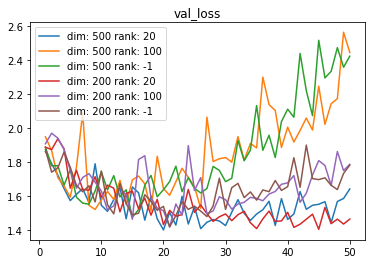

In [15]:
metric = "val_loss"
plot_metric(metric, 500, 20)
plot_metric(metric, 500, 100)
plot_metric(metric, 500, -1)
plot_metric(metric, 200, 20)
plot_metric(metric, 200, 100)
plot_metric(metric, 200, -1)
plt.title(metric)
plt.legend()
plt.show()